# INFO411 Lab 2 - Clustering

## Outline

From our last lab we had our first encounter with Numpy, which is a handy tool for us to manipulate vectors and matrices. In this lab, we continue with the exploration of Numpy, and Pyplot (for visualization), but the main objectives are:
- Gain more understanding of k-means, EM and DBSCAN by working on some simple data sets
- Get started with Sklearn, a machine learning package

## Part 1

We begin with the simple k-means demo written in NumPy. As usual we import the packages:

In [1]:
import numpy as np

In [2]:
d1 = np.random.randn(100)+2
#d2 = np.random.randn(100)+8
d2 = np.random.randn(100)*1.5+8

Now show them up on the screen. Note that for better visibility the array index is used for the x-axis. 

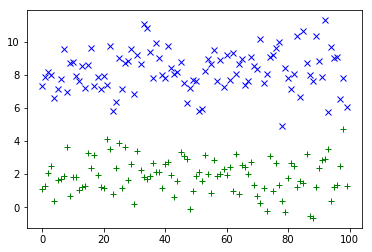

In [3]:
## import the plotting package; use inline display
import matplotlib.pyplot as plt
%matplotlib inline
## plot two subsets using different markers
plt.plot(d1,'g+')
plt.plot(d2,'bx')

Note for better visualization we "expand" the 1-D data for 2-D display using the array index for the x-axis.

We then concatenate the two data clouds into one bigger array (with 200 points):

In [4]:
data=np.concatenate((d1,d2),axis=0)
nrow=len(data)

... and we shuffle the rows to get the data mixed up:

In [5]:
data=np.random.permutation(data)



To do k-means clustering, now we randomly initialise the membership for Cluster 1 (and therefore for Cluster 2)

In [6]:
memb1=np.random.randint(0,2,nrow)
memb2=1-memb1    # membership to Cluster 2

Let the iterations begin: update centres; update membership; ... we run 20 iterations:

In [7]:
## Iterate for a number of times and see if convergence is reached. 
## c1 and c2 are the two cluster centres. 
## This updates the centres, then membership, and loops around
for it in range(20):
    #update c1 and c2
    c1=sum(data*memb1)/sum(memb1)
    c2=sum(data*memb2)/sum(memb2)
    
    
   # if distance to c1 is smaller it belongs to cluster 1, memb1=1; otherwise memb1=0
    memb1=np.greater(np.abs(data-c2), np.abs(data-c1)).astype(int)
    memb2=1-memb1
    print c1,c2

5.02459603555 5.11134302637
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625
1.91687028197 8.28886097625


Now display the cluster centres:

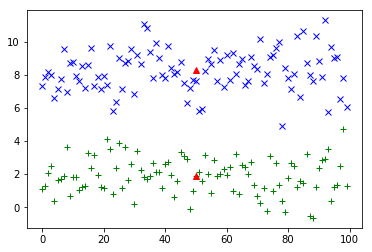

In [8]:
## Display the cluster centers
plt.plot(d1,'g+')
plt.plot(d2,'bx')
plt.plot(nrow/4,c1,'r^')
plt.plot(nrow/4,c2,'r^')

Does the algorithm seem to work? Why?

Your Answer: It does, because the centres of the clusters are approximately in the middle of the cluster dimensions, and the membership appears to be correctly assigned. 


**Task A**. Suppose there is an outlier data point, data[80]=200. Insert it, repeat the experiement above and comment on the results.

1.91687028197 10.2204969719
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238
2.10397082509 10.4511935238


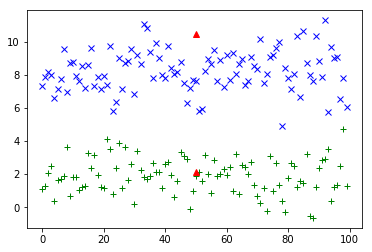

In [9]:
# code for Task A ...

# Introduce an outlier
data[80] = 200



# Repeat the iteration process
for it in range(20):
    c1=sum(data*memb1)/sum(memb1)
    c2=sum(data*memb2)/sum(memb2)
   # if distance to c1 is smaller it belongs to cluster 1, memb1=1; otherwise memb1=0
    memb1=np.greater(np.abs(data-c2), np.abs(data-c1)).astype(int)
    memb2=1-memb1
    print c1,c2



# Plot it out
plt.plot(d1,'g+')
plt.plot(d2,'bx')
plt.plot(nrow/4,c1,'r^')
plt.plot(nrow/4,c2,'r^')




Your comments: 

Introducing this outlier made the result appear less stable. The membership is still correctly assigned, but the centroid is heavily affected by the introduction of an extreme outlier. 

This example demonstrates that a simple k-means clustering algorithm is not robust against outliers in the dataset.







**Task A***. Use the fuzzy c-means scheme with r=2 to decide membership and repeat the experiment. Does it work better?

-2
7.37956828559 4.85171259943
7.86388829537 3.88880707144
8.59804653442 3.38610800853
9.00039461665 3.25993451378
9.13404654582 3.2924320644
9.15882660184 3.32582147422
9.15679438495 3.3382842787
9.15316997838 3.34054022079
9.15168839152 3.34024247574
9.15138964641 3.33985659473
9.15141151109 3.33970814373
9.15145441783 3.33968067645
9.1514721564 3.33968401333
9.15147578942 3.33968858013
9.15147555543 3.33969035787
9.15147504868 3.33969069282
9.15147483653 3.33969065569
9.15147479237 3.33969060167
9.15147479484 3.33969058039
9.15147480083 3.33969057631


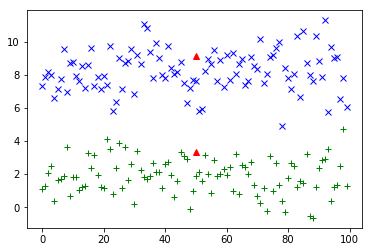

In [10]:
# code for Task A* here... Run it.

memb1=np.random.randint(0,2,nrow)
memb2=1-memb1    # membership to Cluster 2

r = 2
exp = -2/(r-1)

print (exp)

for it in range(20):
    c1=sum(data*memb1)/sum(memb1)
    c2=sum(data*memb2)/sum(memb2)
    
    memb1_divisor = np.power(np.abs(data-c1),exp)
    memb2_divisor = np.power(np.abs(data-c2),exp)
    dividend = (np.power(np.abs(data-c1),exp)+ np.power(np.abs(data-c2),exp))
    
    memb1 = memb1_divisor / dividend
    memb2 = memb2_divisor / dividend
    
   # print ("dividend: ", dividend)
                        
    print c1,c2
    
    
# Plot it out
plt.plot(d1,'g+')
plt.plot(d2,'bx')
plt.plot(nrow/4,c1,'r^')
plt.plot(nrow/4,c2,'r^')


Comments on the outcome:

The data points appear to have have correctly assigned membership (based on visualization). 
The centroid for the bottom cluster moves towards the top. 



## Part 2

We can extend the code and do the clustering using EM instead. Let's cleanse the outlier out first.

In [11]:
data[80]=np.random.randn()+2

In [12]:
## Try EM (simplified)
## Random initialization again. Alternatively, k-means can be used.
#memb1=np.random.randint(0,2,nrow)
#memb2=1-memb1



The following gives the iterations of a simplified EM process. First the two centres are updated using weighted average of members, then the variations. The memberships are then tuned as $e^-\frac{(x-c)^2}{2s}$ and then normalized. This continues and after a number of iterations the outcome stablizes.

it= 0 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 1 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 2 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 3 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 4 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 5 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 6 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 7 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 8 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 9 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 10 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 11 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 12 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it= 13 : 8.23597397105 / 1.25649459596 || 1.84453038933 / 1.01580569032
it

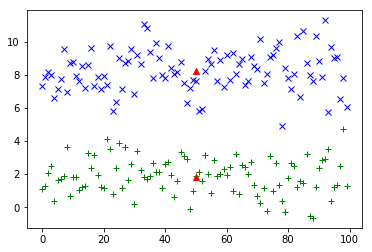

In [14]:
## now the iterations
for it in range(50):
    # update centres
    c1=sum(memb1*data)/sum(memb1)
    c2=sum(memb2*data)/sum(memb2)
    # update 'spread' - the variations
    s1=sum(memb1*(data-c1)**2)/sum(memb1)
    s2=sum(memb2*(data-c2)**2)/sum(memb2)
    # print the center and std
    print 'it=',it,':', c1,'/',np.sqrt(s1),'||',c2,'/',np.sqrt(s2)
    # re-calculate memberships using the center and std values
    memb1=np.exp(-(data-c1)**2/s1/2)
    memb2=np.exp(-(data-c2)**2/s2/2)
    # normalise
    memb1/=(memb1+memb2)
    memb2/=(memb1+memb2)
    
    
# Plot it out
plt.plot(d1,'g+')
plt.plot(d2,'bx')
plt.plot(nrow/4,c1,'r^')
plt.plot(nrow/4,c2,'r^')

Run the code above a couple of times, and see whether it manages to calculate the centres and the spreads of the two Gaussians. Are the clusters correctly located?


** Task B. **
Now, let us take a look whether EM can model data "clouds" of different sizes. For this, comment off the random initialization again. Find the line with 'd2' assignment, and modify it into "d2 = np.random.randn(100)*1.5+8". This means the second cloud has now a bigger spread (stdev=1.5). Run the code to this line, and note what the result tells you about the Gaussian centres and their spreads. If the result is not quite right, try a few more runs.

Then, reuse the code in Part A and conduct k-means clustering to *initialize* the cluster centers and then carry on with EM. Does this work better? 

it= 0 : 8.28397143081 / 1.19576790167 || 1.91372204321 / 1.09380144643
it= 1 : 8.26038809496 / 1.22643238221 || 1.85797844733 / 1.02858527889
it= 2 : 8.24377865799 / 1.24660688955 || 1.84913705073 / 1.01969343333
it= 3 : 8.23848403846 / 1.25329199333 || 1.84611037066 / 1.0171170226
it= 4 : 8.2367974125 / 1.25544232617 || 1.8450598176 / 1.01624365392
it= 5 : 8.23624594744 / 1.25614687415 || 1.84470646626 / 1.01595120376
it= 6 : 8.23606400324 / 1.25637947172 || 1.84458880855 / 1.01585395342
it= 7 : 8.2360037963 / 1.25645645639 || 1.8445497566 / 1.01582168888
it= 8 : 8.23598385376 / 1.25648195805 || 1.84453680835 / 1.01581099263
it= 9 : 8.23597724599 / 1.25649040798 || 1.84453251664 / 1.01580744753
it= 10 : 8.23597505633 / 1.2564932081 || 1.84453109432 / 1.01580627265
it= 11 : 8.2359743307 / 1.25649413603 || 1.84453062296 / 1.0158058833
it= 12 : 8.23597409023 / 1.25649444354 || 1.84453046675 / 1.01580575427
it= 13 : 8.23597401054 / 1.25649454545 || 1.84453041499 / 1.01580571151
it= 14 : 8

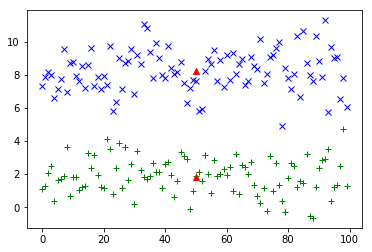

In [15]:
## your code for Task B


# Using K-mean to initialize the cluster centers
for it in range(50):
    c1=sum(data*memb1)/sum(memb1)
    c2=sum(data*memb2)/sum(memb2)
   # if distance to c1 is smaller it belongs to cluster 1, memb1=1; otherwise memb1=0
    memb1=np.greater(np.abs(data-c2), np.abs(data-c1)).astype(int)
    memb2=1-memb1
    #print c1,c2


for it in range(50):
    # update centres
    c1=sum(memb1*data)/sum(memb1)
    c2=sum(memb2*data)/sum(memb2)
    # update 'spread' - the variations
    s1=sum(memb1*(data-c1)**2)/sum(memb1)
    s2=sum(memb2*(data-c2)**2)/sum(memb2)
    # print the center and std
    print 'it=',it,':', c1,'/',np.sqrt(s1),'||',c2,'/',np.sqrt(s2)
    # re-calculate memberships using the center and std values
    memb1=np.exp(-(data-c1)**2/s1/2)
    memb2=np.exp(-(data-c2)**2/s2/2)
    # normalise
    memb1/=(memb1+memb2)
    memb2/=(memb1+memb2)
    
    
# Plot it out
plt.plot(d1,'g+')
plt.plot(d2,'bx')
plt.plot(nrow/4,c1,'r^')
plt.plot(nrow/4,c2,'r^')






Your comments: ...

Using K-means as an initialization step, the results are more stable. The clusters are correctly formed and the centroids are located at the centre of each cluster. 

The stdev of the clusters is approximated with reasonable accuracy. 

## Part 3

So far we have been working on 1-D data points. Let's add another dimension so that they can be properly displayed on the screen. The following k-means code, is good for general-purpose clustering - note there are quite a few changes made to the previous code, mainly to deal with arrays of higher dimensionality. The algorithm is simplified, without looking at stdev of the clusters. 

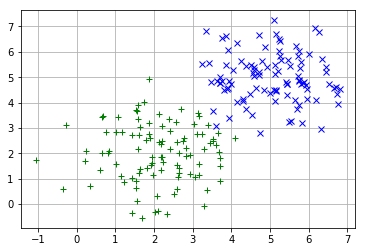

In [16]:
## generate two random data 'clouds' around [2,2] and [8,8], each with 100 points
d1 = np.random.randn(100,2)+2
d2 = np.random.randn(100,2)+5
## show them up on the screen. 
plt.plot(d1[:,0],d1[:,1],'g+')
plt.plot(d2[:,0],d2[:,1],'bx')
plt.grid(b=True)

Again, stack the two sets and shuffle it so it doesn't have any particular order.

In [17]:
## mix two data clouds into one array (200 points)
data=np.vstack((d1,d2))
data=np.random.permutation(data)
nrow,ncol=data.shape

We then define a random initialization function:

In [18]:
def randInitWithData(data, k):
    nrow,dim=data.shape
    centres=np.zeros((k,dim))
    for i in range(k):
        centres[i]=data[np.random.randint(nrow)].copy()
    return centres

and test the function out with k=2:

In [19]:
centres=randInitWithData(data,k=2)

In [20]:
print centres      # Where are the initial centres?

[[ 6.81110098  4.53963594]
 [ 5.42601514  4.7247683 ]]


Now we define a function for going through an iteration of finding membership and update centres:

In [21]:
def iterate(centres,data):
    k,dim=centres.shape
    nrow,dim=data.shape
    ## Compute distances between centres and data points. 
    ## Start with the first centre and then stack the rest vertically
    distances = np.sum((data-centres[0,:])**2,axis=1)
    for j in range(k-1):
        distances = np.vstack((distances, np.sum((data-centres[j+1,:])**2,axis=1)))
        ## 'distances' is a 2D array: row for centres, column for data items
        ## Identify the closest cluster for each data item
        cluster = distances.argmin(axis=0)
        ## Turn it into a single-column array
        cluster = cluster.reshape((nrow,1))
        ## Update the cluster centres as the mean of data items that are closest to them
        for j in range(k):
            thisCluster = np.where(cluster==j,1,0)      # decide membership
            if np.sum(thisCluster)>0:
                centres[j,:] = np.sum(data*thisCluster,axis=0)/np.sum(thisCluster)
    return centres.copy()

In [22]:
oldcentres=centres.copy()      # keep track of the old centres 

Now we call iteratre() a number of times and see if it converges:

In [23]:

# Modified so it will run until the cost is sufficiently low.
while(True):
    centres=iterate(centres,data)
    cost = np.sum(np.abs(centres-oldcentres)) # calculate difference
    
    if cost < 0.0001:
        break
    
    print centres
    print cost
      
    oldcentres=centres.copy()

[[ 6.53695608  4.55743023]
 [ 3.38561727  3.44144496]]
3.61566039877
[[ 5.54586649  5.0885745 ]
 [ 2.55800847  2.7039875 ]]
3.08730011813
[[ 5.06709003  5.05689007]
 [ 2.16680325  2.06830176]]
1.53735185358
[[ 5.03664694  5.00324413]
 [ 2.11049638  2.03211546]]
0.176582211425


Run the code. Do you think it manages to locate the cluster centers in the right places? 

You may want to write a few functions for the above k-means code to automatically stop iterations once convergence is reached.

Let's show them up on the screen again:

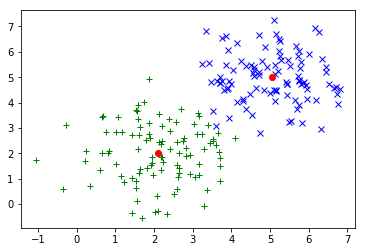

In [24]:
## show them up on the screen. 
plt.plot(d1[:,0],d1[:,1],'g+')
plt.plot(d2[:,0],d2[:,1],'bx')
plt.plot(centres[:,0],centres[:,1],'ro')

## Part 4

Let's experiment with another clustering algoithm and take a quick look of clustering evaluation. For this we turn to Scikit.learn, a package specialised for Machine Learning. First, some necessary imports:

### DBSCAN

In [24]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

We use sklearn's data generators to make three blobs:

In [25]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)

Suppose we set Eps to 0.3, and the minimum number of neighbours needed for a data point to become core points is 10. The following cluster the dataset using DBSCAN, predict cluster labels for all data points, and mark out core points:

In [26]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

The <code>fit()</code> function will learn from the data, and label all data points. Note  DBSCAN will mark out core points, border points, and noise points. Noise points are not clustered, so in sklearn's implementation it takes a label of -1 (while others take 0, 1, ...). The number of clusters can be found by:

In [27]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)





Estimated number of clusters: 3


### Visualization

Using the learning outcome, we can visualize the clustering results. The following code colours the data points according to their cluster IDs, with core points displayed by large markers. Noisy points are displayed in black:

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

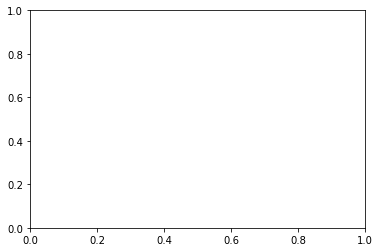

In [29]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # plot core points 
    xy = X[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    # non-core points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

See if you can tell the data point types apart: core points, border points, and noise points. 

### Evaluation

To evaluate the clustering outcome, there are a number of indeces one can use. Here we take a quick look on Silhouette Score.

For a data point with a cluster, its Silhouette Coefficient is decided by two scores:
- a: The mean distance between a sample and all other points in the same cluster.
- b: The mean distance between a sample and all other points in the next nearest cluster.
The Silhouette Coefficient $s$ for the data point is then given as:
$s = \displaystyle\frac{b - a}{max(a, b)}$

The average Silhouette Coefficient of the overall clustering outcome is reported by:

In [31]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.62552476402537949

The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

**Task C**. Parameters play important part in clustering algorithms. How does the setting of Eps affect the clustering outcome? Print out the number of clusters found, and the Silhouette Score when eps takes value from this list: [0.1,0.15,0.2,0.25,0.3,0.35,0.4].

In [ ]:
# Your code here

eps_list = [0.1,0.15,0.2,0.25,0.3,0.35,0.4]

for i in range(0,len(eps_list)):
    db = DBSCAN(eps=eps_list[i], min_samples=10).fit(X)
    labels = db.labels_
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    silhouette_score =  metrics.silhouette_score(X, labels, metric='euclidean')
    print( 'eps value: %.2f' % eps_list[i], 'Estimated number of clusters found: %d.' % n_clusters_,
          " Silhouette score: %f" % silhouette_score)
    







Comment on your findings: 

The larger the eps value, the lower the number of clusters found. In this scenario the optimal eps score is 0.3, as this gives us the highest Silhouette score. The Silhouette score goes down when the eps values goes either way from the optimal value. 






**Task D**. Use the Sklearn K-means function to redo the clustering with k=2, 3, 4, 5. Compare the outcomes of using two initialization schemes: plain random initialization, and k-means++. Report the Silhouette Scores. 

In [214]:
# Your code
k_values=[2, 3, 4, 5]


print("K-Means clustering using k-mean++ for initialization: \n")
for i in range(0,len(k_values)):
    kmeans = KMeans(n_clusters=k_values[i], max_iter = 50, init='k-means++').fit(X)
    labels = kmeans.labels_   

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    silhouette_score =  metrics.silhouette_score(X, labels, metric='euclidean')
    print('K value: %d' % k_values[i], 
          " Silhouette score: %f" % silhouette_score)
    
print("\nK-Means clustering using random initialization: \n")
for i in range(0,len(k_values)):
    kmeans = KMeans(n_clusters=k_values[i], max_iter = 50, init='random').fit(X)
    labels = kmeans.labels_   

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    silhouette_score =  metrics.silhouette_score(X, labels, metric='euclidean')
    print('K value: %d' % k_values[i], 
          " Silhouette score: %f" % silhouette_score)




K-Means clustering using k-mean++ for initialization: 

('K value: 2', ' Silhouette score: 0.516770')
('K value: 3', ' Silhouette score: 0.649608')
('K value: 4', ' Silhouette score: 0.528301')
('K value: 5', ' Silhouette score: 0.432990')

K-Means clustering using random initialization: 

('K value: 2', ' Silhouette score: 0.516770')
('K value: 3', ' Silhouette score: 0.649608')
('K value: 4', ' Silhouette score: 0.528301')
('K value: 5', ' Silhouette score: 0.432990')


Comment on your findings:

I ran the Kmeans function for 50 iterations using Kmeans++ and randomization as initialization methods. 

The Silhouette score for these results are very similar regardless of the method of initialization.  

Perhaps randomized initialization is just as good as Kmeans++? 

END OF LAB 2.